In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from SwapClass import SwapCore
import utilities

In [3]:
files = utilities.getFileNames(file_type='CSV',data_dir="data 26-8-2022")
print(files)

['data 26-8-2022/0_00.CSV', 'data 26-8-2022/0_25.CSV', 'data 26-8-2022/0_50.CSV', 'data 26-8-2022/0_75.CSV', 'data 26-8-2022/1_00.CSV', 'data 26-8-2022/Ladder_100us.CSV', 'data 26-8-2022/Ladder_200us.CSV']


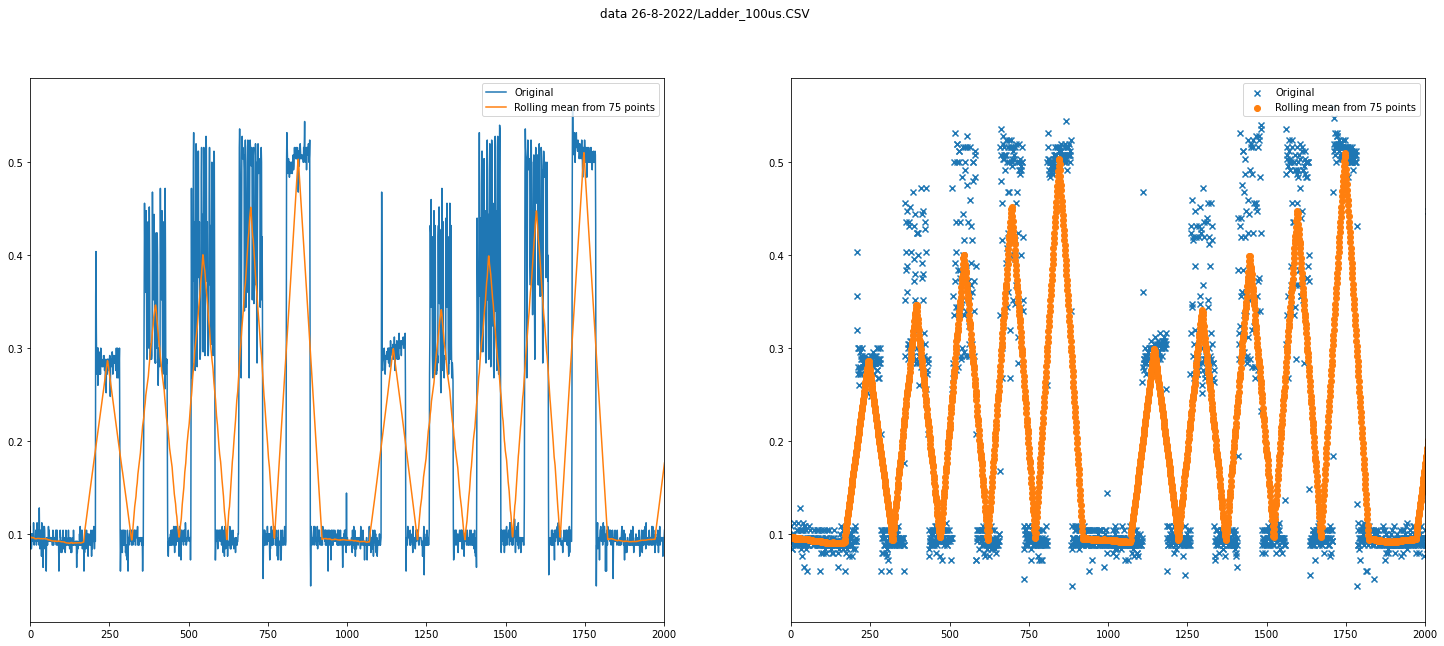

In [4]:
def average_Peaks(path,rollStr=3,xlim=None,rows_to_skip=2):
    df = pd.read_csv(path, skiprows=rows_to_skip, names = ['time', 'value'],index_col=False)
    df['time'] = np.arange(len(df.time))
    adf = df.copy()
    adf['value'] =  adf['value'].rolling(rollStr,min_periods=1).mean()
    adf['time'] = adf['time'] -rollStr//2

    fig, ax = plt.subplots(1, 2, sharey='col',figsize=(25,10))

    plt.suptitle(path)

    ax[0].plot(df.time,df.value,label='Original')
    ax[0].plot(adf.time,adf.value,label=f'Rolling mean from {rollStr} points')
    ax[0].legend(loc="upper right")

    ax[1].scatter(df.time,df.value,marker='x',label='Original')
    ax[1].scatter(adf.time,adf.value,label=f'Rolling mean from {rollStr} points')
    ax[1].legend(loc="upper right")

    ax[0].set_xlim(xlim)
    ax[1].set_xlim(xlim)

    return df, adf

df,adf = average_Peaks(files[5],rollStr=75,xlim=[0,2000])


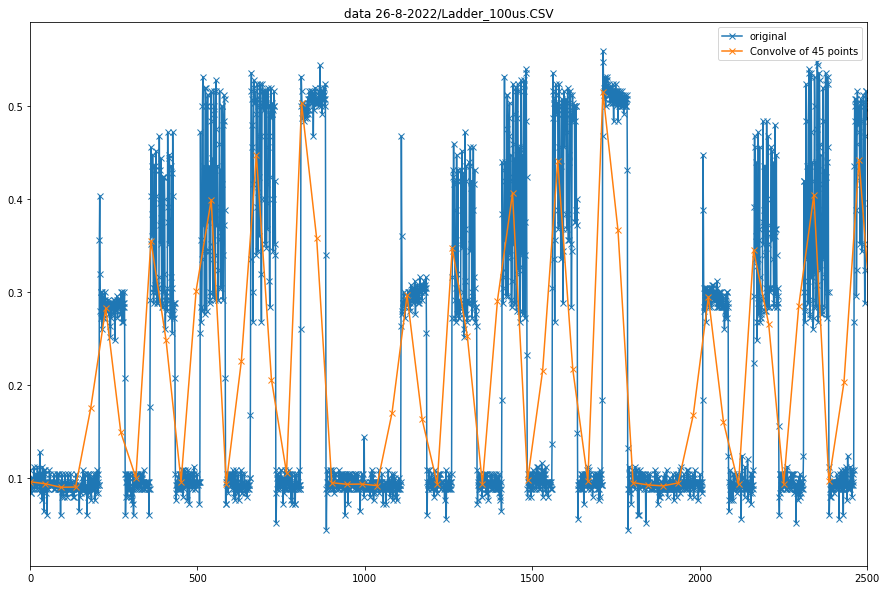

In [5]:
import numpy as np
def average_Peaks2(path,n=3,xlim=None,rows_to_skip=2):
    df = pd.read_csv(path, skiprows=rows_to_skip, names = ['time', 'value'],index_col=False)
    df['time'] = np.arange(len(df.time))

    arr = np.array(df.value)
    window = (1.0 / n) * np.ones(n,)
    res = np.convolve(arr, window, mode='valid')[::n]
    resy = np.arange(1,n*len(res),step=n)

    plt.figure(figsize=[15,10])
    plt.plot(arr,marker='x',label='original')
    plt.plot(resy,res,marker='x',label=f'Convolve of {n} points')
    plt.legend()
    plt.xlim(xlim)
    plt.title(path)

average_Peaks2(files[5],n=45,xlim=[0,2500])


In [6]:
from SwapClass import SwapCore
import utilities
import numpy as np
import pandas as pd
files = utilities.getFileNames(file_type='CSV',data_dir="data 05-9-2022")
print(files)
signal = SwapCore(files[0],rows_to_skip=2)
signal.set_parameters( analysis_without_correction=True, rolling_mean_signal=True,)
signal.load_file()

['data 05-9-2022/SDS00002.CSV', 'data 05-9-2022/SDS00005.CSV']


In [7]:
def find_parameters(values):
    values_avg = np.mean(values)

    peak_start = 0
    peak_end = 0
    going_through_peak = False
    peak_len = []
   

    for index,value in enumerate(values):
        if (not going_through_peak) and (value >= values_avg):
            going_through_peak = True
            peak_start = index
        if going_through_peak and (value < values_avg):
            going_through_peak = False
            peak_end = index
            peak_len.append(peak_end-peak_start)

    _max = max(peak_len)
    peak_len = [x for x in peak_len if x > 0.5*_max]
    peak_avg  = np.mean(peak_len)

    print(peak_len)

    vals  = {"RollStr":(peak_avg//1),"maxPeakDist":(2.5*peak_avg//1),"avgHeight":values_avg}
    parameters_df = pd.DataFrame.from_dict(vals,orient='index')

    return parameters_df

find_parameters(signal.original_value_array)

[1044, 1071, 935, 1040]


,0
RollStr,1022.000000
maxPeakDist,2556.000000
avgHeight,0.212367


In [8]:
peaks = signal.analyze_peaks()

Found signals count (including ones with signal being higher or lower than both ref signals): 15


In [9]:
df = pd.DataFrame.from_dict({'time':signal.time_array,'value':signal.value_array})

In [23]:
str = files[0].split("/")[1][:-4] + "-results.xlsx"
str

'SDS00002-results.xlsx'